# Housing

### Datasets
California Housing Prices [From Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Content
- Visualization:
    - Housing Prices
    - Ocean Proximity
- Classification
    - House Pricing Prediction
        - ***Random Forrest***



## Basic Visualization

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
# ---------- data science ----------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# ---------- preparations ----------
ds = pd.read_csv('housing.csv')
# ds.dropna()
ds['total_bedrooms'] = ds['total_bedrooms'].fillna(ds['total_bedrooms'].median())
ds['total_rooms'] = ds['total_rooms'].fillna(ds['total_rooms'].median())
mapping = {k: v for v, k in enumerate(ds.ocean_proximity.unique())}
ds['ocean_proximity_num'] = ds.ocean_proximity.map(mapping)

## Basic visualization

#### Housing Prices

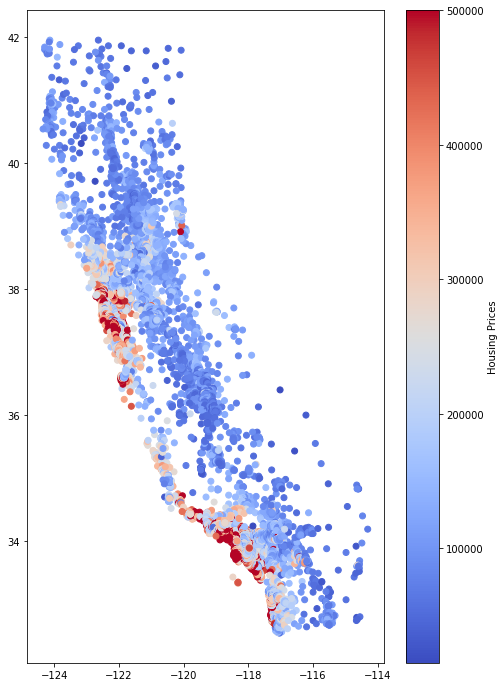

In [26]:
plt.figure(figsize = (8, 12))
s = plt.scatter(ds['longitude'], ds['latitude'], c = ds['median_house_value'], cmap = 'coolwarm')
plt.colorbar(s, label = 'Housing Prices')
plt.show()

In [27]:
print(list(set(ds['ocean_proximity'])))

['NEAR OCEAN', 'ISLAND', 'INLAND', 'NEAR BAY', '<1H OCEAN']


#### Ocean Proximity Visualization

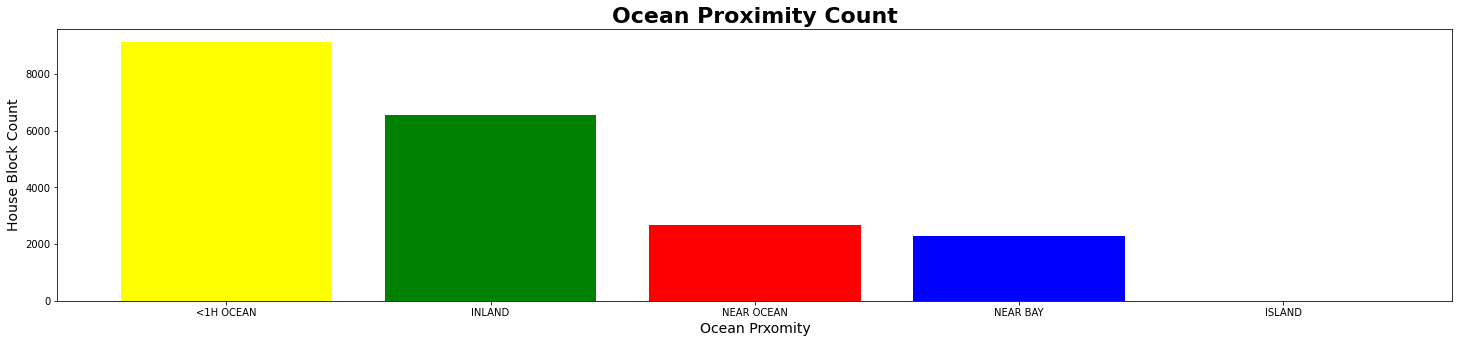

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


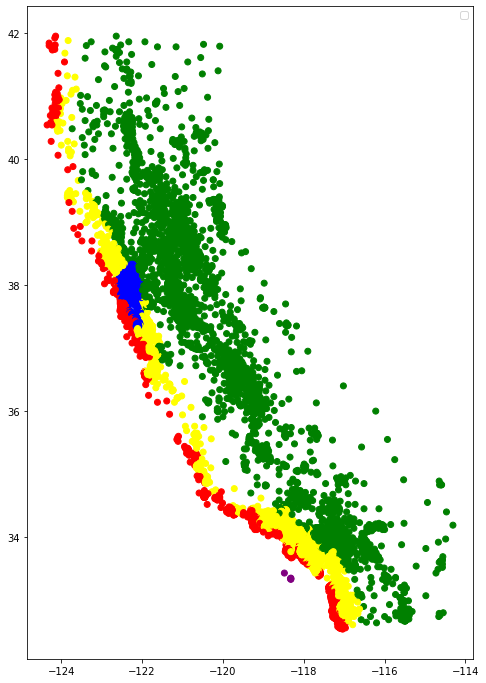

In [39]:
plt.figure(figsize = (25, 5))
colors = {'NEAR OCEAN':'red', 'INLAND':'green', 'NEAR BAY':'blue', '<1H OCEAN':'yellow', 'ISLAND':'purple'}
vc = ds["ocean_proximity"].value_counts()
plt.bar(vc.index, vc, color = ['yellow', 'green', 'red', 'blue', 'purple'])
plt.xlabel('Ocean Prxomity', fontsize = 14)
plt.ylabel('House Block Count', fontsize = 14)
plt.title('Ocean Proximity Count', fontsize = 22, fontweight = 'bold')
plt.show()

plt.figure(figsize = (8, 12))
plt.scatter(ds['longitude'], ds['latitude'], c = ds['ocean_proximity'].map(colors))
plt.legend()
plt.show()

## Classification

#### Random Forrest: Predict House Prices

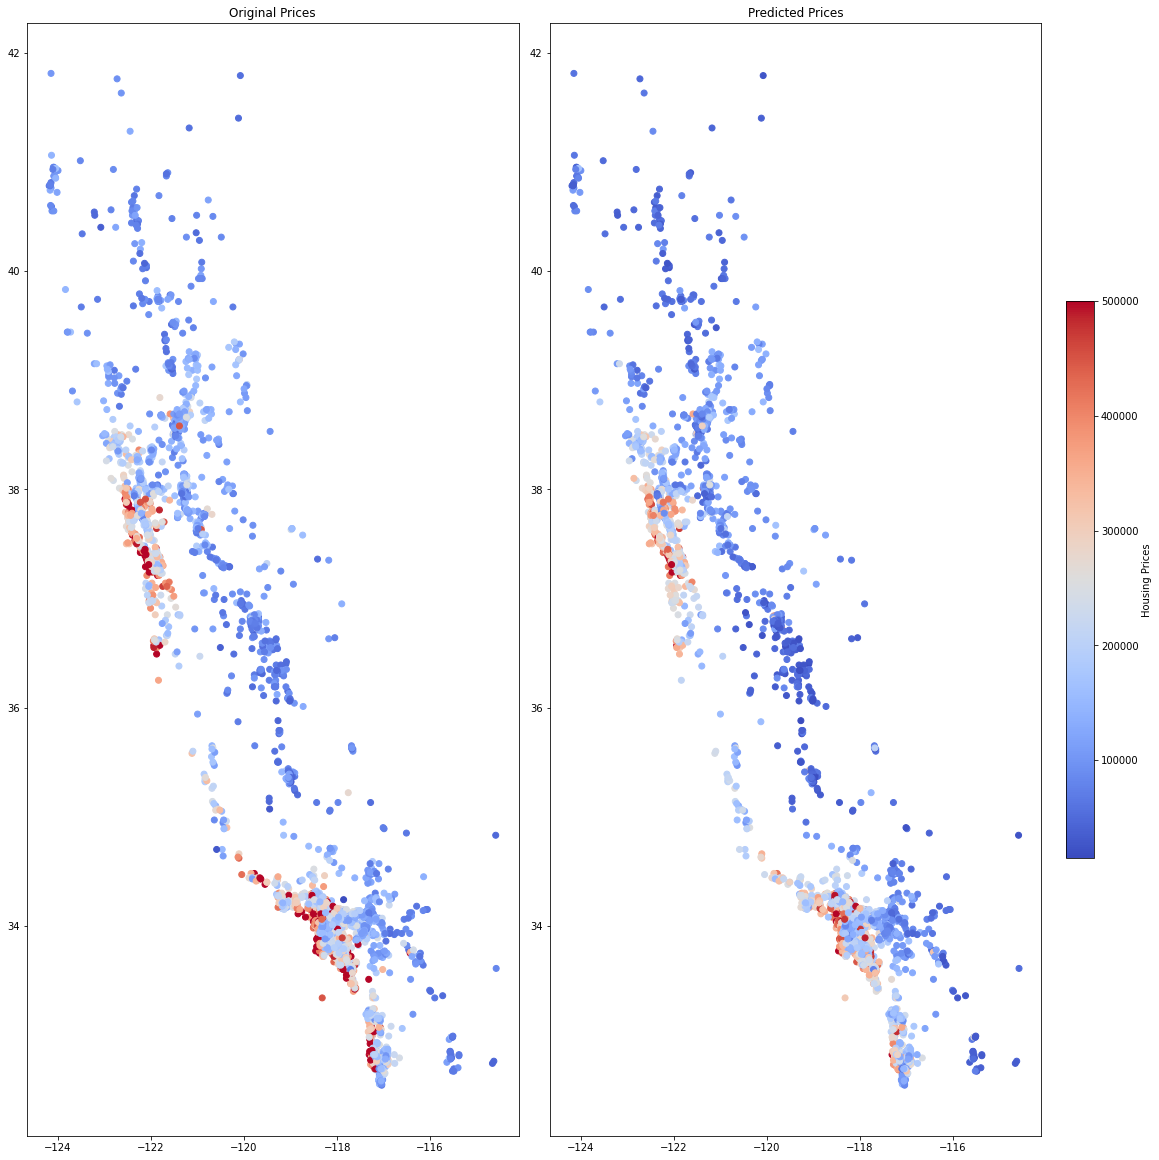

In [24]:
ds_ = ds[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num', 'median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(ds_[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num']], ds_['median_house_value'], test_size = 0.2, random_state = 42)
RFModel = RandomForestRegressor(max_depth = 20, random_state = 42)
RFModel.fit(X_train, y_train)
predictions = RFModel.predict(X_test)

RFModel.score(X_train,y_train), RFModel.score(X_test,y_test)

fig, axes = plt.subplots(1, 2, figsize = (16, 16), constrained_layout = True)
im_1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c = y_test, cmap = 'coolwarm')
im_2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c = predictions, cmap = 'coolwarm')
axes[0].set_title('Original Prices')
axes[1].set_title('Predicted Prices')
color_bar = fig.colorbar(im_1, ax = axes[1], shrink = 0.5, label = "Housing Prices")
plt.show()